# Python в инженерных расчетах. Лекция 06.
<hr style="border:2px solid gray">

#### План занятия:

1. **Что такое функции?**
   - Определение и основные принципы.
   - Пример 1: Функция для расчета модуля Юнга.
   - Пример 2: Функция для визуализации графика с настраиваемыми параметрами.
2. **Что такое классы?**
   - Основные концепции: объекты, атрибуты, методы.
   - Инкапсуляция, Наследование, Полиморфизм.
3. **Создание инженерного класса для обработки данных испытания на растяжение.**
   - Разработка иерархии классов с использованием наследования.

In [112]:
# для начала импортируем библиотеки, которые нам сегодня понадобятся
import numpy as np
import matplotlib.pyplot as plt

## 1. Что такое функции?
Функция — это именованный блок кода, который выполняет определенную задачу. Она позволяет упростить программу, избежать дублирования кода и сделать его более читаемым и организованным.

- **Определение:** Создается с помощью ключевого слова `def`, за которым следует имя функции и список параметров в скобках.
- **Возврат значения:** Используется оператор `return`. Если `return` не указан, функция возвращает `None`.
- **Вызов:** Функция вызывается по ее имени с передачей необходимых аргументов.

In [113]:
# Создадим функцию, которая позволяет выводить на экран графики типа y = f(x)
def plot_graph (x_data, y_data, x_label, y_label, curve_label = None):
    '''
    !!!!!!! подобные комментарии не обязательны, но желательны:
    
    Функция позволяет вывести график y = f(x)
    
    Параметры
    ------------
    x_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy
    y_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy
    x_label - название вектора данных по оси Х. Должен быть переменной типа string
    y_label - название вектора данных по оси Y. Должен быть переменной типа string
    curve_label = название кривой. По умолчание None. Если не None, то должен быть переменной типа string

    Возвращает
    -------------
    None
    '''
    # Визуализируем результаты
    # создаем "базу" для графика
    plt.figure(figsize=(6, 4))
    plt.plot (x_data, y_data, '-', color = 'black', label = curve_label)
    # Добавляем названия осей
    plt.xlabel (x_label, fontsize = 14)
    plt.ylabel (y_label, fontsize = 14)
    # добавляем для красоты сетку
    plt.grid()
    # если curve_label не None, то выводим название графика
    if curve_label:
        plt.legend()

# создадим функцию, которая ищет максимальное значение по y
def get_max_point (x_data, y_data):
    '''
    Функция ищет максимальное значение переменной y и соответствующее ей значение x, f а так же номер индекса этих двух чисел 

    Параметры
    ------------
    x_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy
    y_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy

    Возвращает
    -------------    
    y_max, x - оба типа float 
    ind_max -  индекс, соответсвенно переменная типа integer 
    '''
    # Если параметры пришли не в виде массива NumPy, то преобразоввывем их
    x_data, y_data = [np.array(item) if not isinstance(item, np.ndarray) else item for item in [x_data, y_data]]

    y_max = y_data.max()
    ind_max = y_data.argmax()
    x = x_data [ind_max]

    return y_max, x, ind_max 


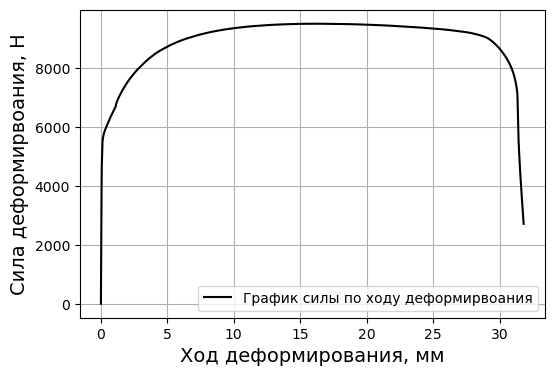

In [114]:
# считаем данные
load_stroke_array = np.loadtxt ('../data/load_stroke_data.txt', delimiter='\t')
# воспользуемся нашей функцией для построения графика
plot_graph(load_stroke_array[:,0], load_stroke_array[:,1], 'Ход деформирования, мм', 'Сила деформирвоания, Н', 'График cилы по ходу деформирвоания')

In [115]:
# назодим максимальное значение силы и соответсвующие ей индекс вектора и значение хода деформирвоания
force_max, stroke, index_force_max = get_max_point (load_stroke_array[:,0], load_stroke_array[:,1])

print (f'Максимальное значение силы: {force_max:.0f} Н при ходе деформирования {stroke:.2f} мм')


Максимальное значение силы: 9502 Н при ходе деформирования 16.47 мм


## 2. Что такое классы?
Класс — это шаблон для создания объектов. Он объединяет данные (атрибуты) и функции (методы), которые работают с этими данными.

Экземпляр класса (объект) — это конкретная реализация этого шаблона с собственным состоянием. Один и тот же класс может иметь множество различных экземпляров, каждый со своими значениями атрибутов.

Итого:
- **Объект:** Конкретный экземпляр класса.
- **Атрибут:** Переменная, принадлежащая объекту (например, `self.load_data`).
- **Метод:** Функция, принадлежащая объекту (например, `self.calculate_strength()`).

### Основные принципы ООП:

1.  **Инкапсуляция:** Скрытие внутренней реализации объекта и предоставление доступа только через публичные методы. Это защищает данные и позволяет менять реализацию без влияния на код, использующий объект. На данной лекции мы этого не касаемся, возможно немного позже - коснемся.
2.  **Наследование:** Возможность создавать новый класс (дочерний), который наследует все атрибуты и методы существующего класса (родительского). Это позволяет повторно использовать код.
3.  **Полиморфизм:** Способность объектов разных классов использовать одинаковые интерфейсы (имена методов) по-разному. Например, метод расчета мех. свойств может быть реализован по-разному для стали и алюминия.

## 3. Создание инженерного класса для обработки данных испытания на растяжение

Теперь мы создадим иерархию классов для обработки данных испытаний. Мы начнем с базового класса и будем расширять его функциональность через наследование.

Базовый класс - **Data_xy**

Дочерние классы - **Mech_properties** и **Flow_stress**

## Базовый класс **Data_xy**

In [116]:
# Создадим базовый класс от которого потом будем делать два или более дочерних
class Data_xy:
    """
    Класс для анализа и визуализации данных y = f(x)
    """
    
    def __init__(self, x_data, y_data, data_name = 'Default data'):
        """
        Инициализация класса с данными
        
        Параметры
        ------------
        x_data - вектор данных по оси X
        y_data - вектор данных по оси Y
        """
        # Преобразуем в numpy arrays если это необходимо
        self.x_data = np.array(x_data) if not isinstance(x_data, np.ndarray) else x_data
        self.y_data = np.array(y_data) if not isinstance(y_data, np.ndarray) else y_data

        self.data_name = data_name
        
        # Проверяем, что длины массивов совпадают
        if len(self.x_data) != len(self.y_data):
            raise ValueError("Длины x_data и y_data должны совпадать")
            
    # декоратор @staticmethod позволяет использовать метод не создавая эксземпляр класса
    @staticmethod
    def plot_graph (x_data, y_data, x_label, y_label, curve_label = None):
        '''    
        Функция позволяет вывести график y = f(x)
        
        Параметры
        ------------
        x_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy
        y_data - вектор данных которые откладываются по оси X. Может быть либо переменной типа список, либо столбец в формате NumPy
        x_label - название вектора данных по оси Х. Должен быть переменной типа string
        y_label - название вектора данных по оси Y. Должен быть переменной типа string
        curve_label = название кривой. По умолчание None. Если не None, то должен быть переменной типа string
    
        Возвращает
        -------------
        None
        '''
        # Визуализируем результаты
        # создаем "базу" для графика
        plt.figure(figsize=(6, 4))
        plt.plot (x_data, y_data, '-', color = 'black', label = curve_label)
        # Добавляем названия осей
        plt.xlabel (x_label, fontsize = 14)
        plt.ylabel (y_label, fontsize = 14)
        # добавляем для красоты сетку
        plt.grid()
        # если curve_label не None, то выводим название графика
        if curve_label:
            plt.legend()
    
    def get_max_point(self, x_data, y_data, print_variables = False):
        '''
        Функция ищет максимальное значение переменной y и соответствующее ей значение x, 
        а так же номер индекса этих двух чисел 

        Возвращает
        -------------    
        y_max, x - оба типа float 
        ind_max - индекс, соответственно переменная типа integer 
        '''
                
        y_max = y_data.max()
        ind_max = y_data.argmax()
        x = x_data[ind_max]
        
        if print_variables:
            print (f'Максимальное значение по оси y: {y_max:.2f}')
            print (f'Соответсвующее ему значение по оси x: {x:.2f}')
            print (f'Соответсвующий индекс: {ind_max}')
        
        return y_max, x, ind_max

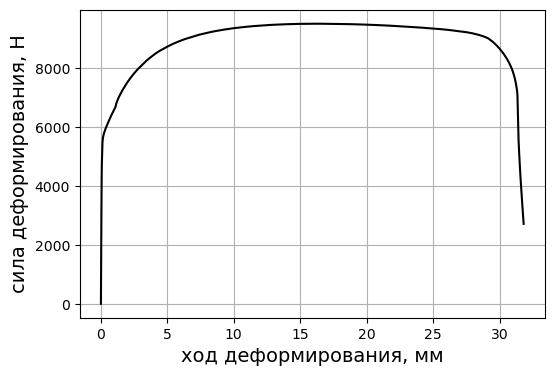

In [117]:
# создадим экземпляр класса
load_stroke_data = Data_xy(load_stroke_array[:,0], load_stroke_array[:,1])
# построим график
load_stroke_data.plot_graph(load_stroke_data.x_data, load_stroke_data.y_data, 
                            'ход деформирования, мм', 'сила деформирования, Н')

In [118]:
force_max, _ , _ = load_stroke_data.get_max_point(load_stroke_data.x_data, load_stroke_data.y_data)
print (f'Максимальная сила: {force_max:.2f}, Н')


Максимальная сила: 9502.07, Н


## Дочерний класс **Stress_strain**

In [119]:
# создадим класс для пересчета силы деформирования в напряжения и деформации
class Stress_strain (Data_xy):
    '''
    Класс для расчета инженерных и истинных напряжений и деформаций
    '''
    def __init__(self, x_data, y_data, L0, A0, Le = None, data_name='Default data'):
        super().__init__(x_data, y_data, data_name)

        self.L0 = L0 # начальная длина образца
        self.Le = Le # длина образца при максимальной нагрузке, если известна
        self.A0 = A0 # площадь поперечного сечения образца

        ### Переменные для хранения напряжений/деформаций
        self.stress_eng, self.strain_eng = None, None
        self.stress_true, self.strain_true = None, None

        ### Переменная для хранения жесткости испытательной машины
        self.k = np.inf # по умолчанию равна бесконечности, т.е. абсолютно твердое тело

        # Поясним, что есть x, а что есть y в данном случае
        # Декоратор @property позволяет "переименовывать" атрибуты
    @property
    def stroke (self): 
        return self.x_data
    @property
    def load (self): 
        return self.y_data

    def get_stifness (self):
        '''
        метод для расчета жесткости испытательной машины
        '''
        if self.Le == None:
            print ('Не задана конечная длина образца. Жесткость испытательной машины посчитать невозможно.') 
            print ('Значение жесткости принято равным бесконечности.')
            self.k = np.inf
            return self.k
        elif isinstance (self.k, (int, float)):
            # Находим точку максимального нагружения
            load_max, stroke_max, max_load_indx = self.get_max_point (self.sroke, self.load)                
            # Рассчитываем изменение размера образца
            delta_L = self.L0 - self.Le
            # Рассчитываем упругую деформацию машины
            elastic_machine_displasement = stroke_max - delta_L
            # Рассчитываем жеткость машины
            self.k = load_max/elastic_machine_displasement
            return self.k       
        else:
            raise ValueError ("Неподдерживаемый тип данных для переменной self.Le (конечная длина образц)")

    def get_strain_eng (self):
        '''
        Расчет инженерной деформации по формуле из Лекции №2
        '''

        # Рассчитываем деформацию машины для каждой точки
        machine_deformation = self.load/self.k

        # Рассчитываем деформацию образца
        specimen_deformation = self.stroke - machine_deformation
        
        self.strain_eng = (specimen_deformation/self.L0)*100

        return self.strain_eng # т.к. мы внутри функции расчитываем переменную self.strain_eng то можно было бы обойтись без
                                # return. Но нам удобно будет, если все-таки функция будет напрямую возвращать переменную 
                                # чуть позже, поэтому оставим ее 

    def get_stress_eng (self):
        '''
        Расчет инженерного напряжения по формуле из Лекции №2
        '''

        self.stress_eng = self.load/self.A0

        return self.stress_eng

    def get_strain_true (self):
        '''
        Расчет истинной деформации по формуле из Лекции №2
        '''

        self.strain_true = np.log(1 + self.strain_eng/100)

        return self.strain_true

    
    def get_stress_true (self):
        '''
        Расчет истинного напряжения по формуле из Лекции №2
        '''

        self.stress_true = self.stress_eng*(1 + self.strain_eng/100)

        return self.stress_true

                
                

In [120]:
# Создаем экземпляр класса
b0 = 20
a0 = 1.5
A0 = a0*b0
L0 = 80
stress_strain = Stress_strain (load_stroke_array[:,0], load_stroke_array[:,1], L0, A0)
_ = stress_strain.get_stifness() # попробуем посчитать жесткость машины


Не задана конечная длина образца. Жесткость испытательной машины посчитать невозможно.
Значение жесткости принято равным бесконечности.


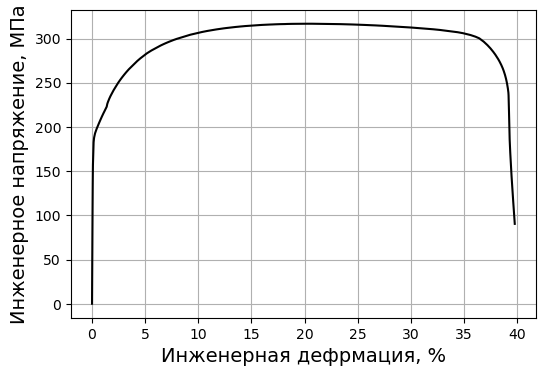

In [121]:
# посчитаем и выведем график инженерных напряжений-деформаций
_ = stress_strain.get_strain_eng()
_ = stress_strain.get_stress_eng()

stress_strain.plot_graph(stress_strain.strain_eng, stress_strain.stress_eng,
                        'Инженерная дефрмация, %', 'Инженерное напряжение, МПа')


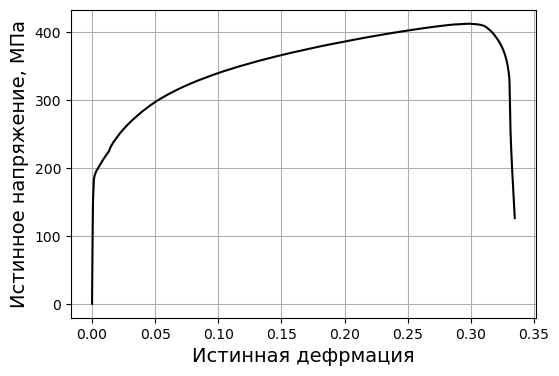

In [122]:
# посчитаем и выведем график истинных напряжений-деформаций
_ = stress_strain.get_strain_true()
_ = stress_strain.get_stress_true()

stress_strain.plot_graph(stress_strain.strain_true, stress_strain.stress_true,
                        'Истинная дефрмация', 'Истинное напряжение, МПа')

## Дочерний класс **Mech_properties**

In [123]:
# создадим класс для расчета мех характеристик
class Mech_properties (Data_xy):
    
    """класс для расчета механических свойств"""
    
    def __init__(self, x_data, y_data, data_name='Default data'):
        super().__init__(x_data, y_data, data_name)

        ### Переменные для хранения механических характеристик
        self.Rm, self.Ag, self.E, self.yield_stress = None, None, None, None

        ### Индекс при Rm
        self.indx_Rm = None

    # Поясним, что есть x, а что есть y в данном случае
    @property
    def strain_eng (self): 
        return self.x_data
    @property
    def stress_eng (self): 
        return self.y_data


    def get_E (self, elastic_limit = 0.05):
        '''
        Функция пытается расчитать модуль Юнга. Если вдруг инженерные напряжения и деформации не были расчитаны, то функция
        выкидывает ошибку
        '''
        try:
            filtr = self.strain_eng <= elastic_limit
            stress_elastic = self.stress_eng[filtr]
            strain_elastic = self.strain_eng[filtr]

            strain_elastic = strain_elastic/100 # переходим от процентов к долям от единицы
            
            numerator = np.sum(stress_elastic * strain_elastic)
            denominator = np.sum(strain_elastic ** 2)
            self.E = numerator / denominator
            return self.E
        except Exception:
            print (f'Ошибка {Exception}')
            print ('Судя по всему инженерные деформация и напряжения не расчитаны или расчитаны неправильно.')
            raise
    

    def get_Rm (self):
        '''
        Функция пытается расчитать предел прочности. Если вдруг инженерные напряжения и деформации не были расчитаны, то функция
        выкидывает ошибку
        '''

        try:
            self.Rm, _, self.indx_Rm = self.get_max_point (self.strain_eng, self.stress_eng)
            return self.Rm
        
        except Exception:
            print (f'Ошибка {Exception}')
            print ('Судя по всему инженерная деформация не расчитана или расчитана неправильно.')
            raise

    
    def get_Ag (self):
        '''
        Функция пытается расчитать предел прочности. Если вдруг инженерные напряжения и деформации не были расчитаны, то функция
        выкидывает ошибку
        '''
        # нам в любом случае понядобятся модуль Юнга и предел прочности, так что если еще их нет, то их нужно посчитать
        if not self.E:
            _ = self.get_E()
        
        if not self.Rm:
            _  = self.get_Rm()

        self.Ag = self.strain_eng[self.indx_Rm]/100 - self.Rm/self.E
        self.Ag = self.Ag*100

        return self.Ag

    def get_yield_stress (self, strain_limit = 0.2):
        '''
        Функция расчитывает предел текучести
        '''
        if not self.E:
            _ = self.get_E()

        filtr = self.strain_eng/100 - self.stress_eng/self.E >= strain_limit/100
        self.yeild_stress = self.stress_eng[filtr][0]
        return self.yeild_stress
        

    def get_properties (self):
        '''
        Функция пытается расчитать все мех. характеристики данного класса.
        '''
        if not self.Ag:
            self.Ag = self.get_Ag()
        if not self.yield_stress:
            self.yield_stress = self.get_yield_stress()
        return {'Модуль Юнга': self.E, 
                'Предел текучести': self.yield_stress, 
                'Предел прочтности': self.Rm, 
                'Равномерное удлинение': self.Ag}


In [126]:
# Создаем экземпляр класса
mech_properties_ = Mech_properties (stress_strain.strain_eng, stress_strain.stress_eng)

In [125]:
properties = mech_properties_.get_properties()
print (f'Предел прочности: {mech_properties_.Rm:.2f} МПа')
print (f'Модуль Юнга: {mech_properties_.E:.2f} МПа')
print (f'Равномерное удлинение: {mech_properties_.Ag:.2f} %')
print (f'Условный предел текучести: {mech_properties_.yield_stress:.2f} МПа')

Предел прочности: 316.74 МПа
Модуль Юнга: 221780.16 МПа
Равномерное удлинение: 20.44 %
Условный предел текучести: 192.91 МПа


# Блок-схема наследования классов

## Базовый класс: Data_xy

| Тип | Название | Описание |
|-----|----------|-----------|
| **Атрибуты** | `x_data` | Вектор данных по оси X |
| | `y_data` | Вектор данных по оси Y |
| | `data_name` | Название набора данных |
| **Методы** | `__init__(x_data, y_data, data_name)` | Конструктор класса |
| | `plot_graph(x_data, y_data, x_label, y_label, curve_label)` | Построение графика |
| | `get_max_point(x_data, y_data, print_variables)` | Поиск максимальной точки |

---

## Дочерний класс: Stress_strain (наследует от Data_xy)

| Тип | Название | Описание | Наследуется |
|-----|----------|-----------|-------------|
| **Атрибуты** | `L0` | Начальная длина образца | ❌ |
| | `A0` | Площадь поперечного сечения | ❌ |
| | `Le` | Конечная длина образца | ❌ |
| | `k` | Жесткость испытательной машины | ❌ |
| | `stress_eng` | Инженерные напряжения | ❌ |
| | `strain_eng` | Инженерные деформации | ❌ |
| | `stress_true` | Истинные напряжения | ❌ |
| | `strain_true` | Истинные деформации | ❌ |
| | `x_data` | Вектор данных по оси X | ✅ |
| | `y_data` | Вектор данных по оси Y | ✅ |
| | `data_name` | Название набора данных | ✅ |
| **Свойства** | `stroke` | Псевдоним для x_data | ❌ |
| | `load` | Псевдоним для y_data | ❌ |
| **Методы** | `__init__(x_data, y_data, L0, A0, Le, data_name)` | Конструктор | ⚡ |
| | `get_stifness()` | Расчет жесткости машины | ❌ |
| | `get_strain_eng()` | Расчет инженерной деформации | ❌ |
| | `get_stress_eng()` | Расчет инженерного напряжения | ❌ |
| | `get_strain_true()` | Расчет истинной деформации | ❌ |
| | `get_stress_true()` | Расчет истинного напряжения | ❌ |
| | `plot_graph()` | Построение графика | ✅ |
| | `get_max_point()` | Поиск максимальной точки | ✅ |

---

## Дочерний класс: Mech_properties (наследует от Data_xy)

| Тип | Название | Описание | Наследуется |
|-----|----------|-----------|-------------|
| **Атрибуты** | `Rm` | Предел прочности | ❌ |
| | `Ag` | Равномерное удлинение | ❌ |
| | `E` | Модуль Юнга | ❌ |
| | `yield_stress` | Предел текучести | ❌ |
| | `indx_Rm` | Индекс при Rm | ❌ |
| | `x_data` | Вектор данных по оси X | ✅ |
| | `y_data` | Вектор данных по оси Y | ✅ |
| | `data_name` | Название набора данных | ✅ |
| **Свойства** | `strain_eng` | Псевдоним для x_data | ❌ |
| | `stress_eng` | Псевдоним для y_data | ❌ |
| **Методы** | `__init__(x_data, y_data, data_name)` | Конструктор | ⚡ |
| | `get_E(elastic_limit)` | Расчет модуля Юнга | ❌ |
| | `get_Rm()` | Расчет предела прочности | ❌ |
| | `get_Ag()` | Расчет равномерного удлинения | ❌ |
| | `get_yield_stress(strain_limit)` | Расчет предела текучести | ❌ |
| | `get_properties()` | Расчет всех характеристик | ❌ |
| | `plot_graph()` | Построение графика | ✅ |
| | `get_max_point()` | Поиск максимальной точки | ✅ |

---

**Условные обозначения:**
- ✅ - Полностью наследуется
- ⚡ - Переопределяется (расширяется)
- ❌ - Не наследуется (новый элемент)